## Model Training

In [31]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import cv2
import os

dataset_dir = "D:/7th/ml/0_major_project/dataset_new"

X = []
y = []
speed_categories = {}  

for filename in os.listdir(dataset_dir):
    if filename.endswith(".jpg"):
        image_path = os.path.join(dataset_dir, filename)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (224, 224))  
        image = image / 255.0  

        speed_label = int(filename.split("_")[1].split(".")[0])

        if speed_label in speed_categories:
            speed_categories[speed_label] += 1
        else:
            speed_categories[speed_label] = 1

        X.append(image)
        y.append(speed_label)

X = np.array(X)
y = np.array(y)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  
    layers.Dense(1, activation='linear')  # Output layer for safety speed prediction (regression)
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')  
# Implement early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_val, y_val),  callbacks=[early_stopping])

loss = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")

model.save("safety_speed_model.h5")
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

Epoch 1/20
57/57 [==============================] - 67s 1s/step - loss: 23.2537 - val_loss: 19.1585
Epoch 2/20
57/57 [==============================] - 63s 1s/step - loss: 17.7225 - val_loss: 20.4772
Epoch 3/20
57/57 [==============================] - 62s 1s/step - loss: 16.3244 - val_loss: 15.9027
Epoch 4/20
57/57 [==============================] - 62s 1s/step - loss: 15.6198 - val_loss: 16.7230
Epoch 5/20
57/57 [==============================] - 63s 1s/step - loss: 15.2945 - val_loss: 15.4365
Epoch 6/20
57/57 [==============================] - 67s 1s/step - loss: 14.5711 - val_loss: 16.8733
Epoch 7/20
57/57 [==============================] - 65s 1s/step - loss: 14.2503 - val_loss: 20.4673
Epoch 8/20
57/57 [==============================] - 63s 1s/step - loss: 13.6220 - val_loss: 15.9261
Epoch 9/20
57/57 [==============================] - 66s 1s/step - loss: 13.2321 - val_loss: 16.8297
Epoch 10/20
57/57 [==============================] - 65s 1s/step - loss: 11.9009 - val_loss: 15.4177

c:\Users\AMAAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 363ms/step
Mean Squared Error (MSE): 411.33694877835796


## Category

In [33]:
import pandas as pd

# Print the count of images for each speed category
for speed, count in speed_categories.items():
    print(f"Speed {speed}: {count} images")

data = pd.DataFrame({'Image_Path': [f'image_{i}.jpg' for i in range(len(X))], 'Speed_Label': y})

csv_filename = 'dataset.csv'
data.to_csv(csv_filename, index=False)
print(f"CSV file '{csv_filename}' has been created.")


Speed 0: 47 images
Speed 10: 115 images
Speed 20: 117 images
Speed 40: 111 images
Speed 5: 114 images
Speed 80: 126 images
CSV file 'dataset.csv' has been created.


In [42]:
print(data.shape)

(630, 25089)


## Split 
## Train = 90%
## Validation = 5%
## Test = 5%

In [43]:
print(X.shape)
print(y)
print(y.shape)
print(y_train.size)
print(y_test)
print(y_test.size)

(630, 224, 224, 3)
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 40 40 40 40 40 40 40 40 40
 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40
 40 40 40 40 40 40 40 40 40 40 4

## Confusion Matrix 

1/1 [==============================] - 0s 340ms/step
Mean Squared Error (MSE): 411.33694877835796
[[1 0 0 2 0 0]
 [2 4 1 0 0 0]
 [2 2 2 0 0 0]
 [1 2 0 3 0 0]
 [0 0 0 2 2 0]
 [0 0 0 4 2 0]]


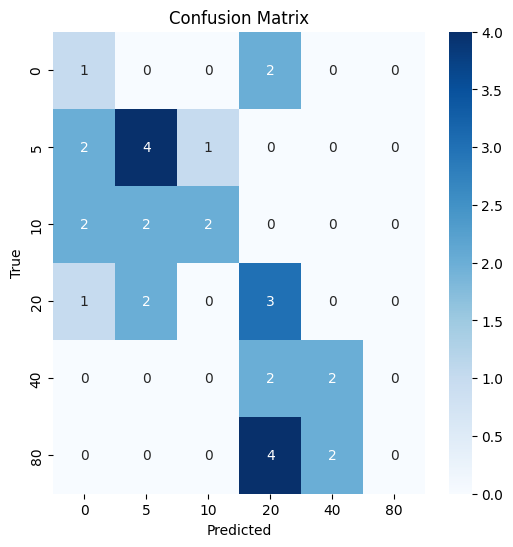

In [45]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, confusion_matrix
import seaborn as sns

model = keras.models.load_model("safety_speed_model.h5")

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

speed_labels = [ 0, 5, 10, 20, 40, 80]

y_true_categories = np.digitize(y_test, bins=speed_labels)
y_pred_categories = np.digitize(predictions, bins=speed_labels)

confusion_mat = confusion_matrix(y_true_categories, y_pred_categories)
print(confusion_mat)

plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=speed_labels, yticklabels=speed_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()




## Testing

In [23]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

model = load_model("safety_speed_model.h5")

#test_image_path = "D:/7th/ml/0_major_project/road/potholes/23.jpg"
#test_image_path = "D:/7th/ml/0_major_project/road/normal/156.jpg"
#test_image_path = "D:/7th/ml/0_major_project/dataset_new/image_5_1001.jpg"
#test_image_path = "D:/7th/ml/0_major_project/dataset_new/image_10_39.jpg"
test_image_path = "D:/7th/ml/0_major_project/testing_dataset/Test_image_55.jpg"
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, (224, 224))  
test_image = test_image / 255.0  

# Reshape the test image to match the model's input shape
test_image = np.expand_dims(test_image, axis=0)

speed_prediction = model.predict(test_image)[0][0]

print(f"Predicted Safety Speed: {speed_prediction}")
print(int(speed_prediction),"Km/h")
if speed_prediction < 5 :
    print("safe speed Below 5 Km/h")
if speed_prediction > 5 and speed_prediction < 10:
    print("safe speed : 5 Km/h - 10 Km/h")
if speed_prediction > 10 and speed_prediction < 20:
    print("safe speed : 10 Km/h - 20 Km/h")
if speed_prediction > 20 and speed_prediction < 40:
    print("safe speed : 20 Km/h - 40 Km/h")
if speed_prediction > 40 and speed_prediction < 80:
    print("safe speed : 40 Km/h - 80 Km/h")
if speed_prediction > 80 :
    print("safe speed Above 80 Km/h")

if speed_prediction>20 :
    print("good road")
else :
    print("bad road")


1/1 [==============================] - 0s 373ms/step
Predicted Safety Speed: 22.796255111694336
22 Km/h
safe speed : 20 Km/h - 40 Km/h
good road


## CREATING DOC

In [15]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import os
from docx import Document
from docx.shared import Inches
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT

# Load the model
model = load_model("safety_speed_model.h5")
input_folder = "D:/7th/ml/0_major_project/testing_dataset/"
output_docx = "output.docx"

doc = Document()

categories = {
    "Below 5 Km/h": [],
    "5 Km/h - 10 Km/h": [],
    "10 Km/h - 20 Km/h": [],
    "20 Km/h - 40 Km/h": [],
    "40 Km/h - 80 Km/h": [],
    "Above 80 Km/h": []
}

for filename in os.listdir(input_folder):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
        test_image_path = os.path.join(input_folder, filename)
        test_image = cv2.imread(test_image_path)
        test_image = cv2.resize(test_image, (224, 224))
        test_image = test_image / 255.0
        test_image = np.expand_dims(test_image, axis=0)
        
        speed_prediction = model.predict(test_image)[0][0]
        
        if speed_prediction < 5:
            categories["Below 5 Km/h"].append((filename, test_image_path, speed_prediction))
        elif 5 <= speed_prediction < 10:
            categories["5 Km/h - 10 Km/h"].append((filename, test_image_path, speed_prediction))
        elif 10 <= speed_prediction < 20:
            categories["10 Km/h - 20 Km/h"].append((filename, test_image_path, speed_prediction))
        elif 20 <= speed_prediction < 40:
            categories["20 Km/h - 40 Km/h"].append((filename, test_image_path, speed_prediction))
        elif 40 <= speed_prediction < 80:
            categories["40 Km/h - 80 Km/h"].append((filename, test_image_path, speed_prediction))
        else:
            categories["Above 80 Km/h"].append((filename, test_image_path, speed_prediction))

# Sort images within each category by speed prediction
for category, image_info in categories.items():
    if image_info:
        doc.add_heading(f"Images in the Category: {category}", level=1)
        for filename, test_image_path, speed_prediction in sorted(image_info, key=lambda x: x[2]):
            paragraph = doc.add_paragraph(f"Image: {filename}")
            paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
            doc.add_picture(test_image_path, height=Inches(2) ,width=Inches(4))
            doc.add_paragraph(f"Predicted Safety Speed: {speed_prediction} Km/h", style='List Bullet')
            if speed_prediction > 13:
                doc.add_paragraph("Good road")
            else:
                doc.add_paragraph("Poor road")
doc.save(output_docx)


1/1 [==============================] - 0s 59ms/step
